In [1]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.model_selection import train_test_split , GridSearchCV 
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score , roc_curve
from pandas_profiling import ProfileReport
from sklearn.model_selection import RandomizedSearchCV


In [2]:
df = pd.read_csv('winequality_red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
set(df.quality)

{3, 4, 5, 6, 7, 8}

In [5]:
ProfileReport(df)

In [6]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
x = df.drop(columns='quality')

In [8]:
x

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [9]:
y = df.quality

In [10]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [11]:
x_train , x_test, y_train,y_test = train_test_split(x,y,test_size = .25,random_state = 30)

In [12]:
x_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
1178,5.6,0.915,0.00,2.1,0.041,17.0,78.0,0.99346,3.68,0.73,11.4
1189,8.8,0.955,0.05,1.8,0.075,5.0,19.0,0.99616,3.30,0.44,9.6
161,7.6,0.680,0.02,1.3,0.072,9.0,20.0,0.99650,3.17,1.08,9.2
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3
961,7.1,0.560,0.14,1.6,0.078,7.0,18.0,0.99592,3.27,0.62,9.3
...,...,...,...,...,...,...,...,...,...,...,...
919,8.4,0.620,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8
1164,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0
500,7.8,0.520,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0
941,9.9,0.270,0.49,5.0,0.082,9.0,17.0,0.99484,3.19,0.52,12.5


In [13]:
x_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
1147,10.0,0.410,0.45,6.20,0.071,6.0,14.0,0.99702,3.21,0.49,11.8
659,7.1,0.840,0.02,4.40,0.096,5.0,13.0,0.99700,3.41,0.57,11.0
871,6.9,0.560,0.03,1.50,0.086,36.0,46.0,0.99522,3.53,0.57,10.6
1333,9.1,0.775,0.22,2.20,0.079,12.0,48.0,0.99760,3.18,0.51,9.6
1411,6.4,0.470,0.40,2.40,0.071,8.0,19.0,0.99630,3.56,0.73,10.6
...,...,...,...,...,...,...,...,...,...,...,...
721,8.9,0.480,0.24,2.85,0.094,35.0,106.0,0.99820,3.10,0.53,9.2
490,9.3,0.775,0.27,2.80,0.078,24.0,56.0,0.99840,3.31,0.67,10.6
575,12.3,0.270,0.49,3.10,0.079,28.0,46.0,0.99930,3.20,0.80,10.2
1051,8.5,0.460,0.59,1.40,0.414,16.0,45.0,0.99702,3.03,1.34,9.2


In [14]:
dt_model = DecisionTreeClassifier()

In [15]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
import sklearn
import  matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline 

In [17]:
sklearn.__version__

'0.22.1'

[Text(616.3260553278689, 1057.0, 'X[10] <= 10.35\ngini = 0.642\nsamples = 1199\nvalue = [8, 35, 512, 477, 153, 14]'),
 Text(366.4333401639344, 996.6, 'X[6] <= 95.5\ngini = 0.528\nsamples = 666\nvalue = [6, 20, 406, 209, 23, 2]'),
 Text(229.62995901639346, 936.2, 'X[9] <= 0.585\ngini = 0.554\nsamples = 584\nvalue = [6, 19, 332, 202, 23, 2]'),
 Text(85.44565573770493, 875.8, 'X[6] <= 90.5\ngini = 0.468\nsamples = 261\nvalue = [3, 14, 179, 63, 2, 0]'),
 Text(59.565737704918035, 815.4000000000001, 'X[10] <= 9.075\ngini = 0.453\nsamples = 250\nvalue = [3, 14, 176, 55, 2, 0]'),
 Text(19.514754098360655, 755.0, 'X[6] <= 39.0\ngini = 0.604\nsamples = 15\nvalue = [0, 2, 6, 7, 0, 0]'),
 Text(11.708852459016393, 694.6, 'X[9] <= 0.54\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(7.805901639344262, 634.2, 'X[5] <= 8.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(3.902950819672131, 573.8, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(11.708852459016

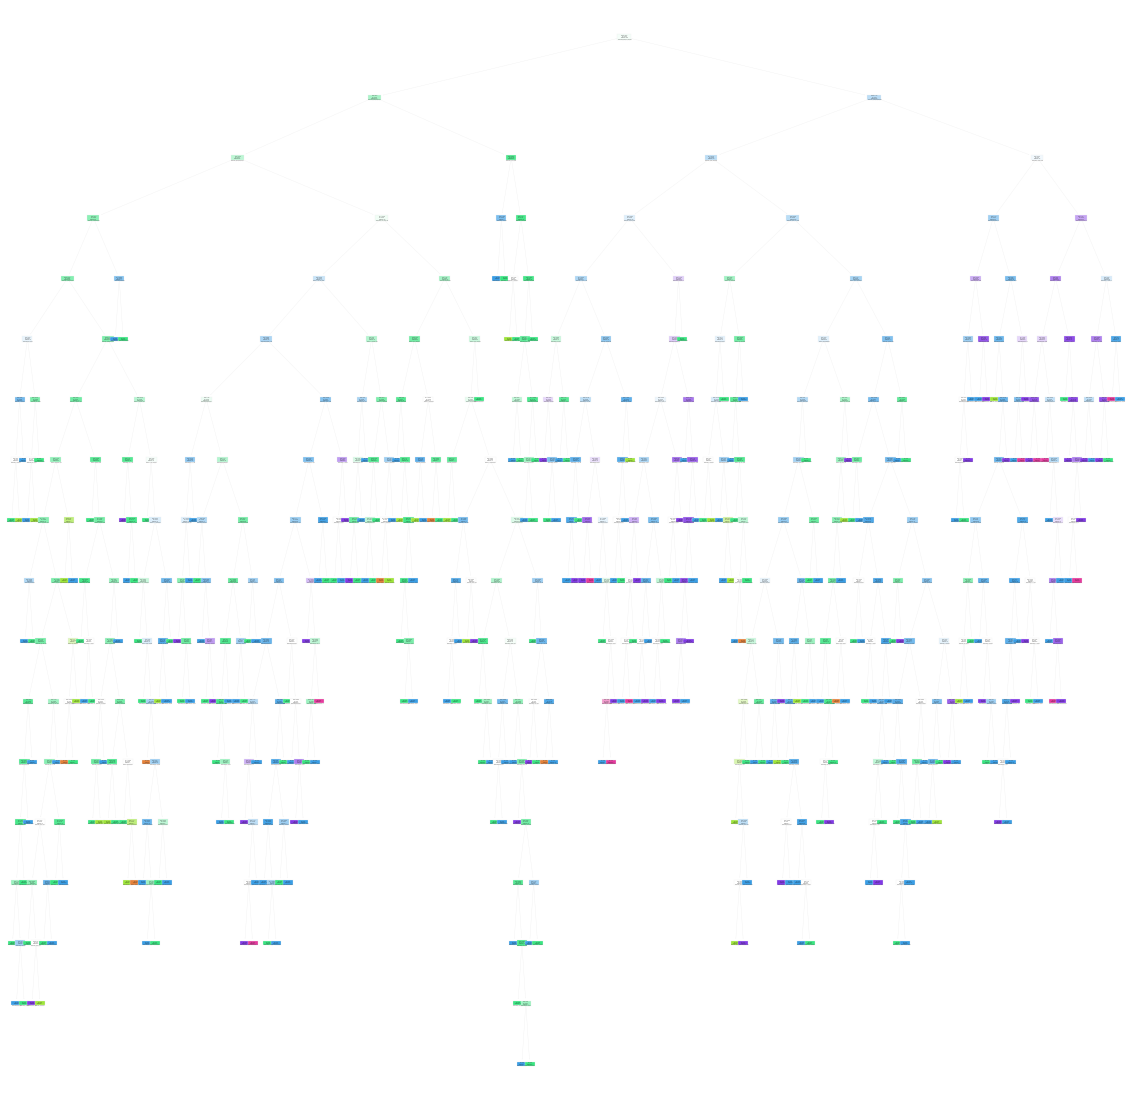

In [18]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled=True)

In [19]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [20]:
df1 = df.head(500)   # in case we use only above 500 data in the dt

In [21]:
x1 = df1.drop(columns='quality')

In [22]:
y1 = df1.quality

In [23]:
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(x1,y1)                    # in case we not split the data into "train" and "test"

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(508.00472036328875, 1057.0, 'alcohol <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]\nclass = 5'),
 Text(319.40965583174, 996.6, 'total_sulfur_dioxide <= 62.5\ngini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]\nclass = 5'),
 Text(201.38145315487574, 936.2, 'citric_acid <= 0.415\ngini = 0.576\nsamples = 169\nvalue = [1, 9, 91, 61, 6, 1]\nclass = 5'),
 Text(95.48948374760995, 875.8, 'alcohol <= 9.05\ngini = 0.525\nsamples = 131\nvalue = [0, 8, 81, 39, 3, 0]\nclass = 5'),
 Text(34.1414913957935, 815.4000000000001, 'sulphates <= 0.54\ngini = 0.403\nsamples = 12\nvalue = [0, 2, 1, 9, 0, 0]\nclass = 6'),
 Text(25.606118546845124, 755.0, 'volatile_acidity <= 0.605\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1, 0, 0, 0]\nclass = 4'),
 Text(17.07074569789675, 694.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]\nclass = 4'),
 Text(34.1414913957935, 694.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]\nclass = 5'),
 Text(42.67686424474188, 755.

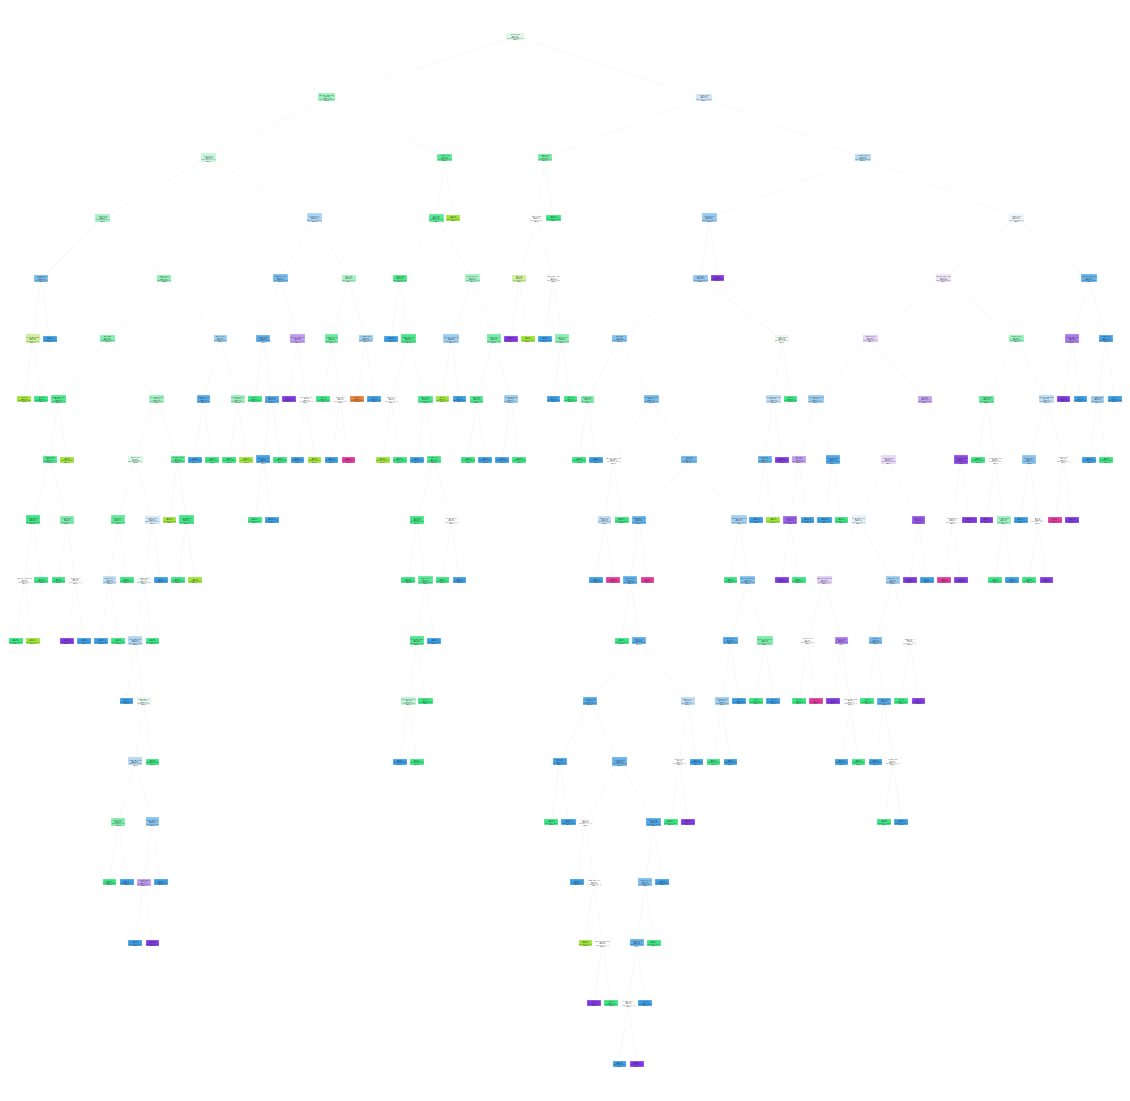

In [24]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model1,filled=True, class_names=[str(i) for i in set(y1)],feature_names=x1.columns)  
# in case as we take small dataset it show welldefine decision tree
# class_names = [str(i) for i set(y1)]-------> print which class it belong
# feature_names --> used to print the col name 

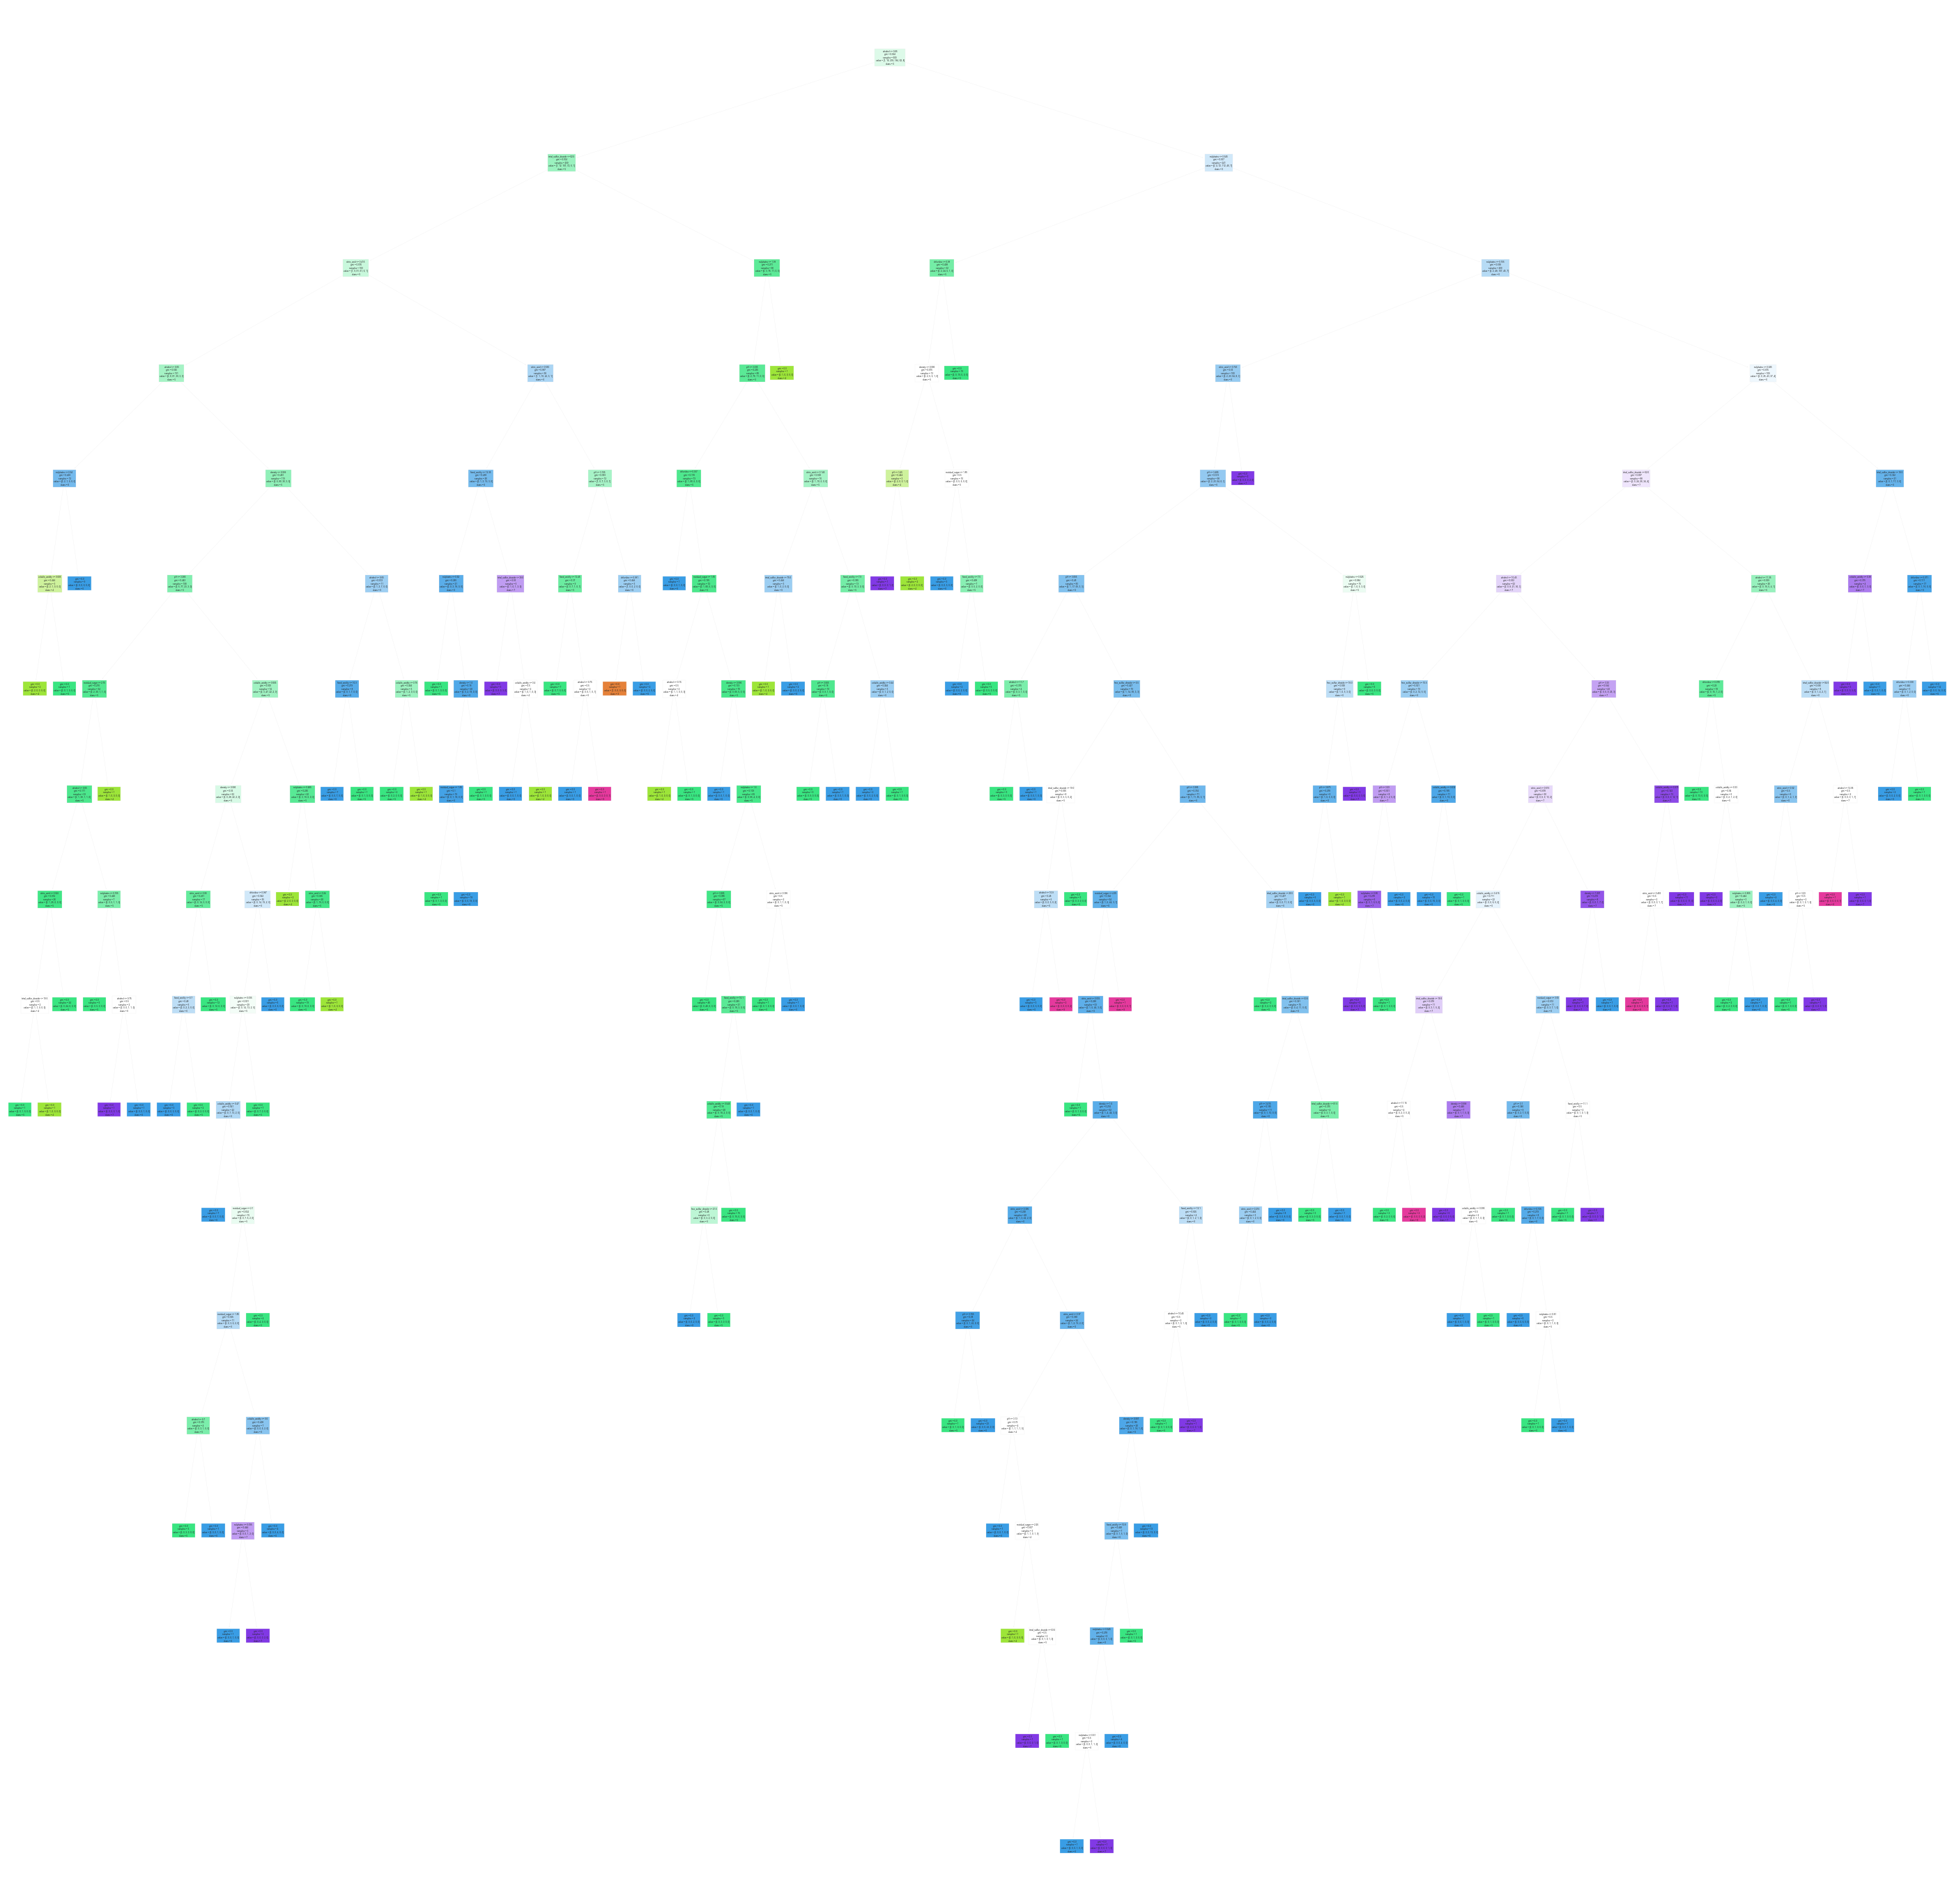

In [25]:
plt.figure(figsize=(50,50))
tree.plot_tree(dt_model1,filled=True, class_names=[str(i) for i in set(y1)] ,feature_names=x1.columns)
plt.savefig('dt_model_1')

# plt.savefig("fig_name")   is used to save the fig 

In [26]:
y1

0      5
1      5
2      5
3      6
4      5
      ..
495    8
496    6
497    5
498    8
499    6
Name: quality, Length: 500, dtype: int64

In [27]:
[str(i) for i in set(y1)]

['3', '4', '5', '6', '7', '8']

In [28]:
set(y1)

{3, 4, 5, 6, 7, 8}

In [29]:
df1

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.9972,3.15,0.65,11.0,8
496,7.8,0.52,0.25,1.9,0.081,14.0,38.0,0.9984,3.43,0.65,9.0,6
497,7.2,0.34,0.32,2.5,0.090,43.0,113.0,0.9966,3.32,0.79,11.1,5
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.9972,3.15,0.65,11.0,8


In [30]:
dt_model1.predict(x1)

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 4, 5, 5, 4, 6, 5,
       5, 4, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 7, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 5, 4, 5, 5, 5, 6, 5, 4, 5, 5, 5, 5, 6, 5, 6, 5,
       5, 5, 5, 6, 5, 5, 4, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5,
       5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 4, 5, 5,
       5, 5, 5, 5, 5, 6, 5, 4, 6, 5, 5, 5, 5, 4, 6, 5, 4, 6, 6, 6, 5, 5,
       5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6,
       7, 4, 7, 5, 5, 5, 6, 7, 7, 5, 5, 7, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5,
       6, 5, 5, 6, 4, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 7, 7, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 7, 5, 4, 5, 5,
       5, 7, 4, 8, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 8, 7, 6, 7, 5, 7, 5, 5,
       6, 6, 7, 5, 7, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6,

In [31]:
dt_model1.score(x1,y1)   # as model has 100 percent accuracy as pass whole model

1.0

here "less accuracy" is not an issue but there is huge amount of different in train accuracy  and test accuracy  that issue , it always create an issue. 
* here (x1 and y1) -- having the 100% acc and the for random dataset (x_test,y_test)-- 57% only which very very less
* so model is not acceptable
* for this we do some sort of prunning operation and built the entire decision tree
* prunning- try to remove the leaf node [complexity cost became less]

In [32]:
dt_model1.score(x_test, y_test)  # here we check on random dataset giving 57% accuracy
# in this is kind of overfitted model

0.5975

In [33]:
path = dt_model1.cost_complexity_pruning_path(x1,y1)

In [34]:
path

{'ccp_alphas': array([0.        , 0.00166667, 0.00175   , 0.00181818, 0.00184615,
        0.00186667, 0.00188235, 0.00192308, 0.002     , 0.002     ,
        0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
        0.002     , 0.002     , 0.002     , 0.002     , 0.00203333,
        0.00261111, 0.00262769, 0.00266667, 0.00266667, 0.00266667,
        0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
        0.00266667, 0.00271329, 0.00272222, 0.003     , 0.003     ,
        0.003     , 0.003     , 0.00304762, 0.00304762, 0.00305051,
        0.00308418, 0.00325   , 0.00328205, 0.00333333, 0.00333333,
        0.00334032, 0.00336606, 0.00342857, 0.00343316, 0.0035    ,
        0.0035    , 0.0036    , 0.00363636, 0.00373809, 0.0038    ,
        0.0038237 , 0.004     , 0.00404444, 0.00428571, 0.00428571,
        0.00437662, 0.00462338, 0.00465709, 0.00466667, 0.0048    ,
        0.00487179, 0.00504242, 0.00508235, 0.00509091, 0.00510606,
        0.00516667, 0.00568485, 0.

In [35]:
path = dt_model1.cost_complexity_pruning_path(x1,y1)  # original dataset at time of training dataset
ccp_alpha = path.ccp_alphas

here ccp_alpha is "cost_complexcity of prunning"
* cc alpha = 0 it mean infinite growing tree it will created branches
*  * now set some of "cc alpha = thershold -- then at every point it check complexity of each branch and compare it  and stop tree to grow" if value became larger

In [36]:
ccp_alpha

array([0.        , 0.00175   , 0.00181818, 0.00184615, 0.00185   ,
       0.00186667, 0.00188235, 0.00192308, 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.00261111, 0.00262769,
       0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
       0.00266667, 0.00266667, 0.00266667, 0.00271329, 0.00272222,
       0.00283333, 0.003     , 0.003     , 0.003     , 0.003     ,
       0.00304762, 0.00305051, 0.00308418, 0.00328205, 0.00333333,
       0.00333333, 0.00334032, 0.00336606, 0.00342857, 0.00343316,
       0.0035    , 0.0035    , 0.0036    , 0.00363636, 0.00373809,
       0.0038    , 0.0038237 , 0.004     , 0.00404444, 0.00428571,
       0.00437662, 0.00462338, 0.00465709, 0.00466667, 0.0048    ,
       0.00495726, 0.00504242, 0.00508235, 0.00509091, 0.00510606,
       0.00516667, 0.00568485, 0.00589394, 0.00656364, 0.00671079,
       0.0067591 , 0.00688352, 0.00688889, 0.007     , 0.00701

* in case passing one by one ccp_alpha[going to each and every value]    and making the decision tree
*   default ccp_alpha = 0.0 
*  we try to bulid the decison tree with different different type        ccp_alpha value and try to test which going to fine for me

In [37]:
dt_modle2 = []
for ccp in ccp_alpha:
    dt_m  = DecisionTreeClassifier(ccp_alpha=ccp) 
    dt_m.fit(x1,y1)         
    dt_modle2.append(dt_m)     
    # we try to append our model in this list i having muliple model with different ccp_alpha value

Text(0, 0.5, 'score')

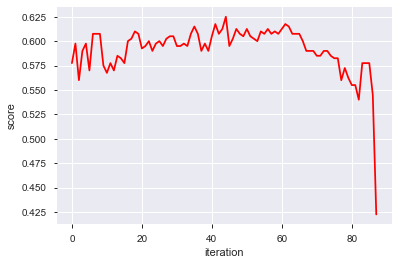

In [38]:
dt_model2 = []
score = []
for i in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha = i)
    dt_m.fit(x1,y1)
    dt_model2.append(dt_m)
    score.append(dt_m.score(x_test, y_test))

    
plt.plot(score, 'r-+')
plt.xlabel('iteration')
plt.ylabel('score')

In [39]:
dt_modle2    
# how many model we build all are there with different ccp-alpha value 
# 1st one is defalut ccp_alpha=0.0
# now which i select out of this :- model which having "less overfitted" result one 

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.00175, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0018181818181818184, class_weight=None,
                        criterion='gini', max_depth=

In [40]:
# in above graph we can select the ccp_alpha value where "train and test" accuracy close to each other
# so it not create overfitted model
# 1st i have to find out the trainning accuracy [mode score] one by one we go to each and every model

In [41]:
train_score = [i.score(x1,y1) for i in dt_modle2]

In [42]:
test_score = [i.score(x_test ,y_test) for i in dt_modle2]

In [43]:
train_score

[1.0,
 0.998,
 0.996,
 0.994,
 0.992,
 0.99,
 0.99,
 0.986,
 0.964,
 0.962,
 0.964,
 0.966,
 0.966,
 0.964,
 0.962,
 0.962,
 0.964,
 0.962,
 0.952,
 0.948,
 0.928,
 0.93,
 0.93,
 0.932,
 0.934,
 0.93,
 0.932,
 0.928,
 0.93,
 0.926,
 0.928,
 0.918,
 0.92,
 0.914,
 0.91,
 0.916,
 0.914,
 0.912,
 0.904,
 0.896,
 0.896,
 0.898,
 0.898,
 0.888,
 0.89,
 0.884,
 0.88,
 0.882,
 0.882,
 0.874,
 0.866,
 0.86,
 0.858,
 0.854,
 0.856,
 0.842,
 0.848,
 0.824,
 0.818,
 0.824,
 0.81,
 0.804,
 0.802,
 0.794,
 0.79,
 0.786,
 0.784,
 0.78,
 0.776,
 0.776,
 0.772,
 0.768,
 0.762,
 0.758,
 0.742,
 0.728,
 0.718,
 0.698,
 0.69,
 0.682,
 0.676,
 0.676,
 0.636,
 0.596,
 0.596,
 0.596,
 0.558,
 0.478]

In [44]:
test_score

[0.6025,
 0.5875,
 0.5825,
 0.5675,
 0.6175,
 0.5975,
 0.605,
 0.6125,
 0.595,
 0.5775,
 0.5875,
 0.59,
 0.605,
 0.6,
 0.6025,
 0.6125,
 0.58,
 0.6025,
 0.5925,
 0.6,
 0.605,
 0.6,
 0.6025,
 0.6075,
 0.5875,
 0.61,
 0.6125,
 0.595,
 0.61,
 0.61,
 0.6075,
 0.5975,
 0.6025,
 0.6125,
 0.6025,
 0.585,
 0.5875,
 0.5875,
 0.595,
 0.615,
 0.5925,
 0.6025,
 0.61,
 0.62,
 0.615,
 0.6025,
 0.6075,
 0.605,
 0.6075,
 0.6125,
 0.6175,
 0.615,
 0.6125,
 0.6,
 0.61,
 0.6025,
 0.61,
 0.61,
 0.605,
 0.6025,
 0.615,
 0.6175,
 0.6175,
 0.6075,
 0.6075,
 0.6075,
 0.6,
 0.59,
 0.59,
 0.59,
 0.5825,
 0.5825,
 0.5925,
 0.59,
 0.585,
 0.5825,
 0.5825,
 0.56,
 0.5725,
 0.5625,
 0.555,
 0.555,
 0.54,
 0.5775,
 0.5775,
 0.5775,
 0.545,
 0.4225]

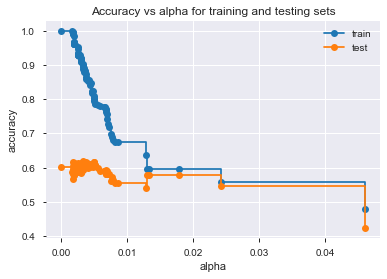

In [45]:
# here we plot a graph where we see the sort of relation of train score and test score and ccp_alpha 
# we are suppose to select that model where and train and test score almost closer to each other
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha, train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

* here we can say that we able to come closer and bring train and test accuracy more near

* handel the overfitted model just "increase the datasize" because model does not have that kind of relation so just increase the dataset
* as data size increase the complexcity also increase 
* in case we observe that alpha in b/w 0.1 to 0.4 so model train and test accuracy  both more closer

In [62]:
dt_model_ccp = DecisionTreeClassifier(random_state=0 , ccp_alpha=.014) 
# here we tune one perameter ccp_alpha try to perform "prunning"
# we say which branching having complexcity more than this "remove" that branch
dt_model_ccp.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.014, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

[Text(1395.0, 2265.0, 'X[10] <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]'),
 Text(697.5, 1359.0, 'X[6] <= 62.5\ngini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]'),
 Text(348.75, 453.0, 'gini = 0.576\nsamples = 169\nvalue = [1, 9, 91, 61, 6, 1]'),
 Text(1046.25, 453.0, 'gini = 0.271\nsamples = 90\nvalue = [0, 3, 76, 11, 0, 0]'),
 Text(2092.5, 1359.0, 'X[9] <= 0.545\ngini = 0.657\nsamples = 241\nvalue = [0, 4, 72, 112, 46, 7]'),
 Text(1743.75, 453.0, 'gini = 0.408\nsamples = 32\nvalue = [0, 2, 24, 5, 1, 0]'),
 Text(2441.25, 453.0, 'gini = 0.638\nsamples = 209\nvalue = [0, 2, 48, 107, 45, 7]')]

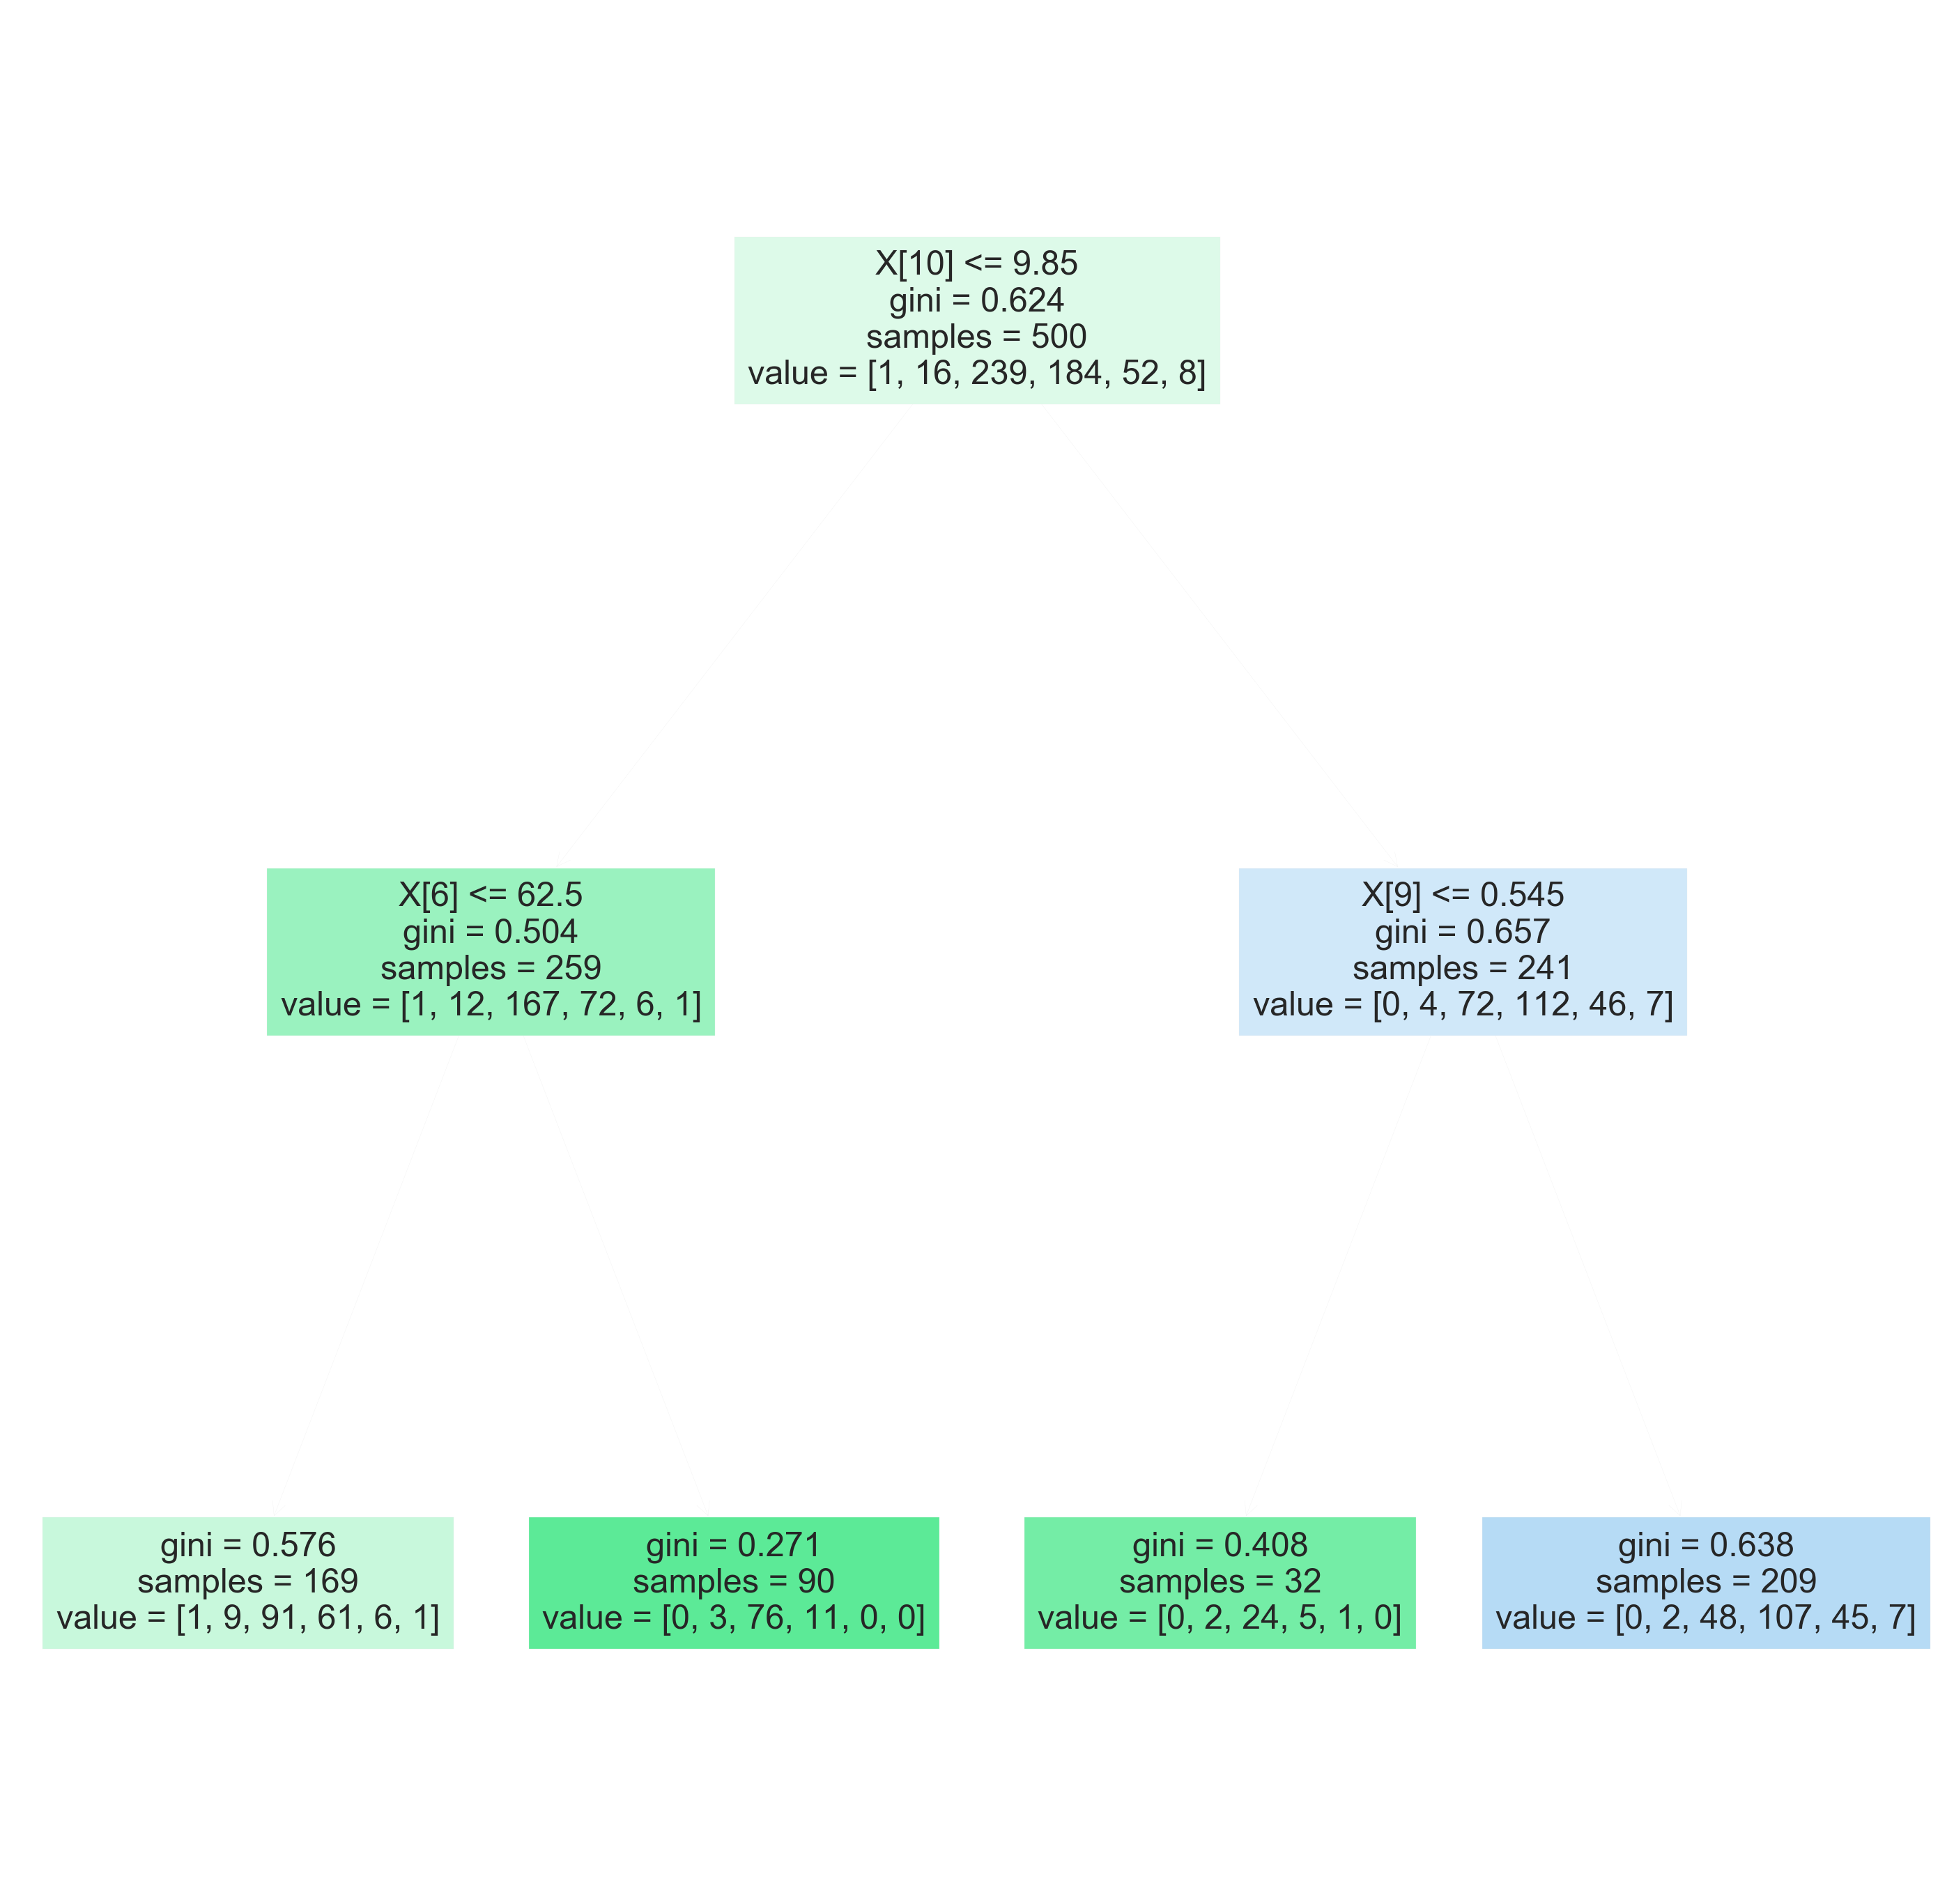

In [47]:
plt.figure(figsize=(50,50))
tree.plot_tree(dt_model_ccp,filled=True)

# this model is created after performing "hyper parameter tunning"

In [48]:
dt_model_ccp.score(x1,y1)

0.596

In [49]:
dt_model_ccp.score(x_test,y_test)

0.5775

### Notes:
* if we getting a good score that not reality if i build a "generalize model" which working in same in both "training and testing unknown dataset" that is called model building

** if accuracy is very high is not finiallize model it must be constant with both training and testing unknown dataset

In [50]:
DecisionTreeClassifier()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
grid_pram = {"criterion":['gini','entropy'],
             "splitter":['best','random'],
             "max_depth" : range(2,40,1),
             "min_samples_split":range(2,10 ,1),
             "min_samples_leaf":range(1,10,1),
             'ccp_alpha':np.random.rand(20)
             }

# it will make all the combination try to all test it 

In [52]:
grid_ccp = GridSearchCV(estimator=dt_model_ccp,param_grid=grid_pram , cv = 10 , n_jobs=-1)
# cv - crossValidation how many dataset it divide
# n_jobs = -1 [[mean occupy all the "processor" of cpu and perform the task]]
# in case of "n_jobs = 4" it mean it not engage all the processor it divide power

In [53]:
grid_ccp.fit(x1,y1)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.014,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='de...
       0.45564764, 0.14049818, 0.10693243, 0.16787809, 0.45204101,
       0.28016825, 0.80181307, 

In [54]:
# .best_params_  --> to find out the best perameter from above

grid_ccp.best_params_

{'ccp_alpha': 0.08984246465181367,
 'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [55]:
dt_cpp_new1 = DecisionTreeClassifier(criterion="entropy",max_depth=15,min_samples_leaf=2, splitter="random")

In [56]:
dt_cpp_new2 = DecisionTreeClassifier(criterion='entropy' , max_depth=17 ,min_samples_leaf=1 , min_samples_split=3 , splitter='random',ccp_alpha=0.014)

In [57]:
dt_cpp_new1.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [58]:
dt_cpp_new2.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.014, class_weight=None, criterion='entropy',
                       max_depth=17, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [59]:
dt_cpp_new1.score(x1,y1)  # in case the accuracy score of the train is far from testing

0.864

In [60]:
dt_cpp_new2.score(x1,y1)

0.618

In [61]:
dt_cpp_new.score(x_test,y_test)

NameError: name 'dt_cpp_new' is not defined

### Question --
* if we have overfitting model what we will do --
** so we do "GridSearchCV" and "RandomSearchCV"
* In Deep Learning we use "Keras_Tunner"

*  hpyerPerameter not giving you best "robust model"

### RandomSearchCV

In [ ]:
from random import randint

In [ ]:
param = {'max_depth': [6,9, None], 
          'max_features': randint(1,6),
          'criterion' : ['gini', 'entropy'],
          'bootstrap':[True, False],
          'mln_samples_leaf': randint(1,4)
           }

In [ ]:
random_ccp = RandomizedSearchCV(estimator=dt_model_ccp,param_distribution=param, cv = 10 ,n_iter=100, n_jobs=-1)

###### RandomSearchCV has less compute intensive then gridsearchCV becaurse random search cv go randomly & took any value where GridSearchCV try each and every cases

## Confusion Matrix

In [ ]:
pred = dt_cpp_new.predict(x_train)

In [ ]:
confusion_matrix(y_train,pred)

here we get 6*6 matrix :- 
#### Note:-
* 0,0 value occurs in the matrix because the class is not available .   because we take class data for prediciton one dataset (y_train).       over there all 6 class available and sort of class not available.

* the meaning of this no. is --> 
